## 逻辑斯蒂回归

In [110]:
# linear_model线性模块
# 名字虽然叫逻辑回归，作用于分类
# 分类: 男女 水果类别
# 回归: 线性回归，作用拟合方程，预测趋势，曲线走势
from sklearn.linear_model import LogisticRegression

### sigmoid函数

In [111]:
import numpy as np
import matplotlib.pyplot as plt

<font size=6>$sigmoid = \frac{1} {1 + e^{-x}}$</font>

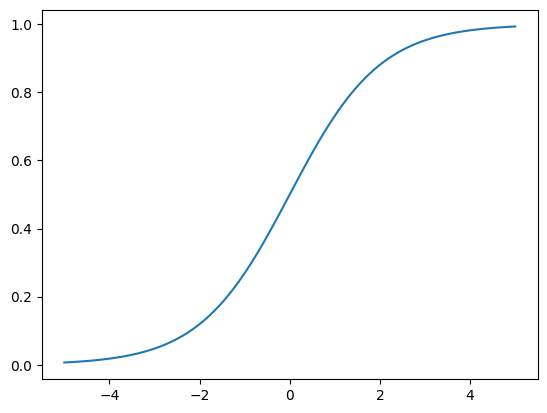

In [112]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

x = np.linspace(-5,5,100)
y = sigmoid(x)

plt.plot(x,y)

### 损失函数立体化呈现

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale,StandardScaler

In [154]:
x,y = datasets.load_breast_cancer(return_X_y=True)

In [155]:
#切片强两个特征
x = x[:,:2]
#对数据进行z-score归一化
x = scale(x)
display(x.shape,y.shape)

(569, 2)

(569,)

In [156]:
model = LogisticRegression()
model.fit(x,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [157]:
w1 = model.coef_[0,0]
w2 = model.coef_[0,1]
b = model.intercept_
print('方程系数:',w1,w2)
print('方程截距:',b)

方程系数: -3.336421768653383 -0.8767014817409342
方程截距: [0.69943181]


In [158]:
#sigmoid函数定义
def sigmoid(x,w1,w2,b):
    z = w1 * x[0] + w2 * x[1] + b #表示线性返程
    return 1/ (1 + np.exp(-z))

In [159]:
def loss_function(x,y,w1,w2,b):
    loss = 0
    for x_i,y_i in zip(x,y):
        p = sigmoid(x_i,w1,w2,b)
        #p = np.clip(p,0.000001,0.999999)
        loss += -(y_i * np.log(p) + (1-y_i) * np.log(1-p))
    return loss

In [120]:
np.clip([0,1,2,3,4,5,6],2,5)

array([2, 2, 2, 3, 4, 5, 5])

In [160]:
w1_space = np.linspace(w1 - 2,w1 + 2,100)
w2_space = np.linspace(w2 - 2,w2 + 2,100)
display(w1_space,w2_space)

array([-5.33642177, -5.29601773, -5.25561369, -5.21520965, -5.17480561,
       -5.13440157, -5.09399753, -5.05359349, -5.01318945, -4.97278541,
       -4.93238136, -4.89197732, -4.85157328, -4.81116924, -4.7707652 ,
       -4.73036116, -4.68995712, -4.64955308, -4.60914904, -4.568745  ,
       -4.52834096, -4.48793692, -4.44753288, -4.40712884, -4.3667248 ,
       -4.32632076, -4.28591672, -4.24551268, -4.20510864, -4.1647046 ,
       -4.12430056, -4.08389652, -4.04349248, -4.00308844, -3.96268439,
       -3.92228035, -3.88187631, -3.84147227, -3.80106823, -3.76066419,
       -3.72026015, -3.67985611, -3.63945207, -3.59904803, -3.55864399,
       -3.51823995, -3.47783591, -3.43743187, -3.39702783, -3.35662379,
       -3.31621975, -3.27581571, -3.23541167, -3.19500763, -3.15460359,
       -3.11419955, -3.07379551, -3.03339147, -2.99298743, -2.95258338,
       -2.91217934, -2.8717753 , -2.83137126, -2.79096722, -2.75056318,
       -2.71015914, -2.6697551 , -2.62935106, -2.58894702, -2.54

array([-2.87670148, -2.83629744, -2.7958934 , -2.75548936, -2.71508532,
       -2.67468128, -2.63427724, -2.5938732 , -2.55346916, -2.51306512,
       -2.47266108, -2.43225704, -2.391853  , -2.35144896, -2.31104492,
       -2.27064088, -2.23023684, -2.18983279, -2.14942875, -2.10902471,
       -2.06862067, -2.02821663, -1.98781259, -1.94740855, -1.90700451,
       -1.86660047, -1.82619643, -1.78579239, -1.74538835, -1.70498431,
       -1.66458027, -1.62417623, -1.58377219, -1.54336815, -1.50296411,
       -1.46256007, -1.42215603, -1.38175199, -1.34134795, -1.30094391,
       -1.26053987, -1.22013583, -1.17973178, -1.13932774, -1.0989237 ,
       -1.05851966, -1.01811562, -0.97771158, -0.93730754, -0.8969035 ,
       -0.85649946, -0.81609542, -0.77569138, -0.73528734, -0.6948833 ,
       -0.65447926, -0.61407522, -0.57367118, -0.53326714, -0.4928631 ,
       -0.45245906, -0.41205502, -0.37165098, -0.33124694, -0.2908429 ,
       -0.25043886, -0.21003482, -0.16963077, -0.12922673, -0.08

In [161]:
import warnings
#warnings.filterwarnings('ignore')

In [162]:
loss_1 = np.array([loss_function(x,y,i,w2,0) for i in w1_space]) #计算时，忽略截距，只研究w1和w2关系

In [163]:
loss_2 = np.array([loss_function(x,y,w1,i,0) for i in w2_space])

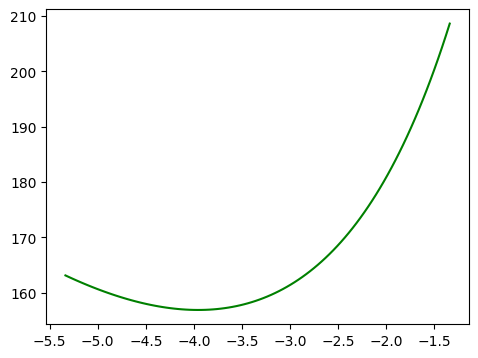

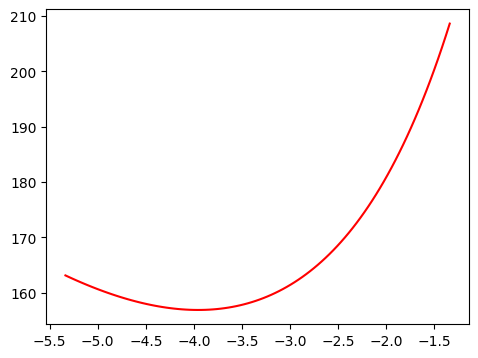

In [164]:
fig1 = plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
plt.plot(w1_space,loss_1,color = 'green')

fig1 = plt.figure(figsize=(12,9))
plt.subplot(2,2,2)
plt.plot(w1_space,loss_1,color = 'red')

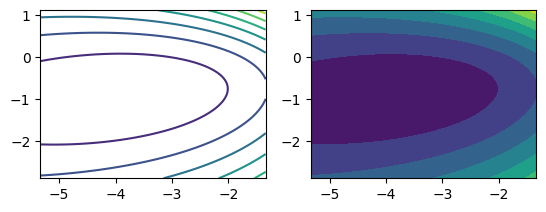

In [165]:
plt.subplot(2,2,3)
w1_grid,w2_grid = np.meshgrid(w1_space,w2_space)
loss_grid = loss_function(x,y,w1_grid,w2_grid,0)
plt.contour(w1_grid,w2_grid,loss_grid)

plt.subplot(2,2,4)
plt.contourf(w1_grid,w2_grid,loss_grid)

### 3D可视化

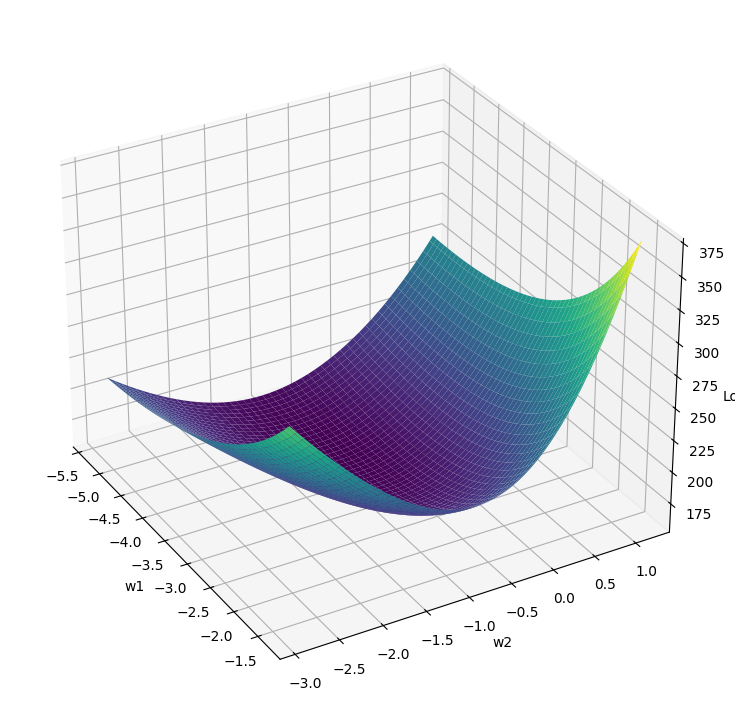

In [166]:
fig2 = plt.figure(figsize=(12, 9))
ax = fig2.add_subplot(111, projection='3d')
ax.plot_surface(w1_grid,w2_grid,loss_grid,cmap='viridis')
# 添加标签
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Loss')

ax.view_init(30,-30)

In [128]:
w1_grid,w2_grid = np.meshgrid([1,2],[2,1])
display(w1_grid,w2_grid)

array([[1, 2],
       [1, 2]])

array([[2, 2],
       [1, 1]])

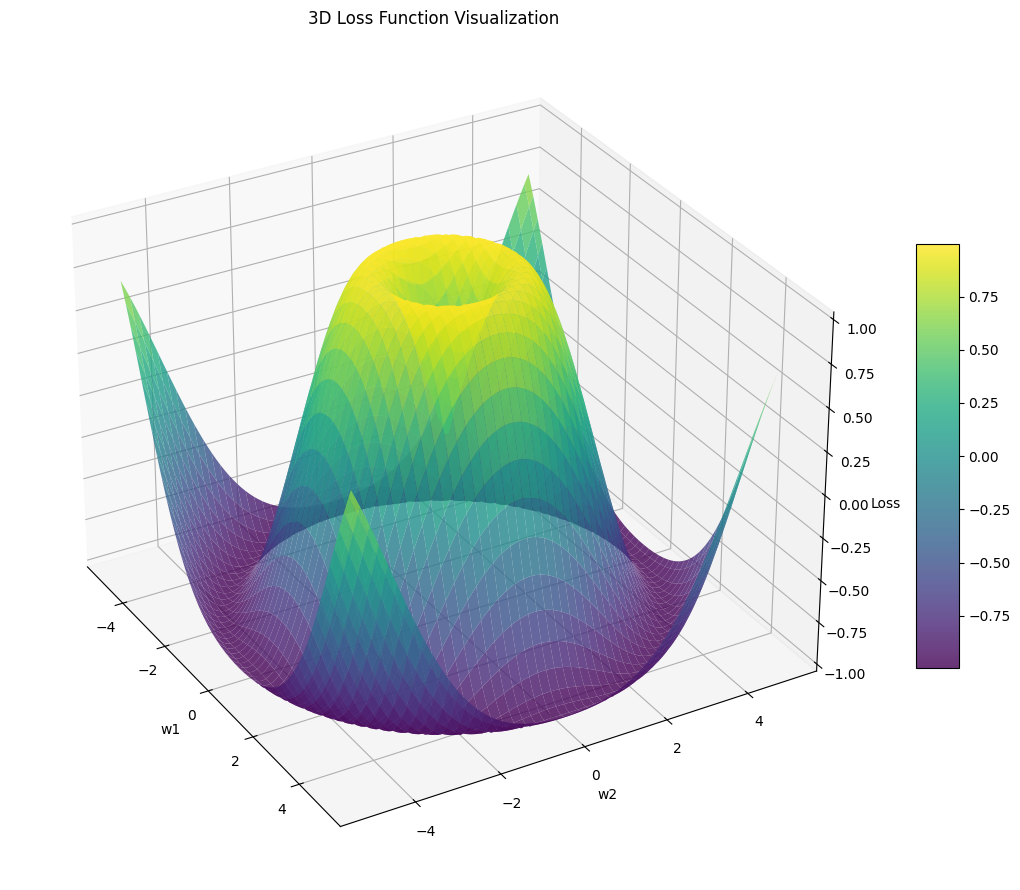

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 生成示例数据（替换为您的实际数据）
w1 = np.linspace(-5, 5, 100)
w2 = np.linspace(-5, 5, 100)
v1_grid, w2_grid = np.meshgrid(w1, w2)
loss_grid = np.sin(np.sqrt(v1_grid**2 + w2_grid**2))

# 创建3D图形
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D曲面
surf = ax.plot_surface(v1_grid, w2_grid, loss_grid, cmap='viridis', alpha=0.8)

# 添加标签
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Loss')

# 设置视角
ax.view_init(30, -30)

# 添加颜色条
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.title('3D Loss Function Visualization')
plt.tight_layout()
plt.show()

### 代码实现与概率手动计算

In [167]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [169]:
x,y = datasets.load_iris(return_X_y=True)
cond = y != 2
display(cond)
x = x[cond]
y = y[cond]
y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [176]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
display(x_train.shape,x_test.shape,y_train.shape,t_test.shape)

(80, 4)

(20, 4)

(80,)

(20,)

In [177]:
model = LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [179]:
y_pred = model.predict(x_test)
print('预测结果是:',y_pred)
print('真实类别是:',y_test)
proba_ = model.predict_proba(x_test)
print('预测概率是:',proba_)

预测结果是: [1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1]
真实类别是: [1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1]
预测概率是: [[0.0208011  0.9791989 ]
 [0.97880365 0.02119635]
 [0.01740068 0.98259932]
 [0.01984734 0.98015266]
 [0.94114829 0.05885171]
 [0.02308726 0.97691274]
 [0.98667683 0.01332317]
 [0.01534578 0.98465422]
 [0.97014714 0.02985286]
 [0.98407668 0.01592332]
 [0.99360742 0.00639258]
 [0.0072869  0.9927131 ]
 [0.94540321 0.05459679]
 [0.07757572 0.92242428]
 [0.96313785 0.03686215]
 [0.96783665 0.03216335]
 [0.00533049 0.99466951]
 [0.98074944 0.01925056]
 [0.97386859 0.02613141]
 [0.00930736 0.99069264]]


In [ ]:
proba_.argmax(axis =1) #概率转化为类别

In [182]:
#### 手动计算概率
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

w = model.coef_[0]
b = model.intercept_

z = x_test.dot(w) + b
p = sigmoid(z)

#列合并
np.column_stack([1-p,p])

array([[0.0208011 , 0.9791989 ],
       [0.97880365, 0.02119635],
       [0.01740068, 0.98259932],
       [0.01984734, 0.98015266],
       [0.94114829, 0.05885171],
       [0.02308726, 0.97691274],
       [0.98667683, 0.01332317],
       [0.01534578, 0.98465422],
       [0.97014714, 0.02985286],
       [0.98407668, 0.01592332],
       [0.99360742, 0.00639258],
       [0.0072869 , 0.9927131 ],
       [0.94540321, 0.05459679],
       [0.07757572, 0.92242428],
       [0.96313785, 0.03686215],
       [0.96783665, 0.03216335],
       [0.00533049, 0.99466951],
       [0.98074944, 0.01925056],
       [0.97386859, 0.02613141],
       [0.00930736, 0.99069264]])

### One VS Rest举例说明

In [183]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [224]:
x,y = datasets.load_iris(return_X_y=True)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, #测试数据比例
                                                 random_state=1024) #随机打乱数据 固定
display(x_train.shape,x_test.shape,y_train.shape,t_test.shape)

(120, 4)

(30, 4)

(120,)

(20,)

In [187]:
model = LogisticRegression(multi_class='ovr')  #One VS Rest 模式
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
display(y_pred[:10],y_test[:10])

print('逻辑回归OVR实现方式准确率:',model.score(x_test,y_test))

array([1, 0, 2, 2, 0, 0, 1, 2, 1, 0])

array([1, 0, 2, 2, 0, 0, 1, 2, 1, 0])

逻辑回归OVR实现方式准确率: 1.0


In [191]:
from sklearn.metrics import accuracy_score #评估准确率分数
#accuracy_score?? 查看方法参数
accuracy_score(y_test,y_pred)


1.0

In [193]:
(y_pred==y_test).sum()/30 #手动计算准确率

np.float64(1.0)

### 进行概率预测

In [195]:
np.set_printoptions(suppress=True)
proba_ = model.predict_proba(x_test)
proba_[:10]

array([[0.15341379, 0.83997188, 0.00661434],
       [0.81156522, 0.18842332, 0.00001146],
       [0.00001367, 0.31456352, 0.68542281],
       [0.00087416, 0.43024593, 0.56887991],
       [0.79198777, 0.20800671, 0.00000552],
       [0.86111735, 0.13887887, 0.00000378],
       [0.00650464, 0.84075035, 0.15274502],
       [0.00019236, 0.19353609, 0.80627155],
       [0.01377757, 0.65812617, 0.32809626],
       [0.84338687, 0.15660797, 0.00000516]])

#### 概率手动计算

In [215]:
#from sklearn.preprocessing import scale
#### 手动计算概率
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

w = model.coef_
#display(w.shape,x_test.shape)

b = model.intercept_

z = x_test.dot(w.T) + b

p = sigmoid(z)


p = p / p.sum(axis = 1).reshape(-1,1)

display(p[:10])

array([[0.15341379, 0.83997188, 0.00661434],
       [0.81156522, 0.18842332, 0.00001146],
       [0.00001367, 0.31456352, 0.68542281],
       [0.00087416, 0.43024593, 0.56887991],
       [0.79198777, 0.20800671, 0.00000552],
       [0.86111735, 0.13887887, 0.00000378],
       [0.00650464, 0.84075035, 0.15274502],
       [0.00019236, 0.19353609, 0.80627155],
       [0.01377757, 0.65812617, 0.32809626],
       [0.84338687, 0.15660797, 0.00000516]])

## 多分类Softmax回归

In [217]:
#自定义softmax函数
def softmax(z):
    return np.exp(z) / np.exp(z).sum()

z = [3,1,-3]
softmax(z).round(2)

array([0.88, 0.12, 0.  ])

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
#训练数据和测试对比
from sklearn.model_selection import train_test_split

In [2]:
x,y = datasets.load_iris(return_X_y=True)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1024)
display(x_train.shape,x_test.shape)
display(x_test[:5])
display(y_train)

(112, 4)

(38, 4)

array([[5. , 2.3, 3.3, 1. ],
       [4.8, 3.4, 1.9, 0.2],
       [7.6, 3. , 6.6, 2.1],
       [5.7, 2.5, 5. , 2. ],
       [4.7, 3.2, 1.6, 0.2]])

array([0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2,
       2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1,
       2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2,
       1, 2])

In [4]:
model = LogisticRegression(multi_class='multinomial') #多分类，表示softmax进行概率划分

model.fit(x_train,y_train)
print('算法预测的准确率:',model.score(x_test,y_test))
print('算法预测测试数据的概率:\n',model.predict_proba(x_test)[:5])
model.coef_ #三个y对应三组方程，三个类别。三组w，每组w有4个，分别对应4个特征。所以w矩阵为3*4

算法预测的准确率: 0.9736842105263158
算法预测测试数据的概率:
 [[1.59838623e-01 8.35005756e-01 5.15562072e-03]
 [9.47275792e-01 5.27235232e-02 6.85133861e-07]
 [1.70035736e-07 6.86282400e-03 9.93137006e-01]
 [4.40620392e-04 1.65698040e-01 8.33861340e-01]
 [9.68239478e-01 3.17603141e-02 2.07601978e-07]]


D:\AI\pytroch_learning\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


array([[-0.41041841,  0.8469743 , -2.36630351, -0.94477955],
       [ 0.48959204, -0.2303341 , -0.18565684, -0.78995977],
       [-0.07917364, -0.61664021,  2.55196035,  1.73473932]])

#### 概率手动计算

In [229]:
w_ = model.coef_
b_ = model.intercept_
def softmax(z):
    return np.exp(z) / np.exp(z).sum(axis=1).reshape(-1,1)
z = x_test.dot(w_.T) + b_
softmax(z)[:5]

array([[0.15273038, 0.84294822, 0.0043214 ],
       [0.9452421 , 0.05475736, 0.00000055],
       [0.00000014, 0.0068055 , 0.99319436],
       [0.00041297, 0.16470813, 0.8348789 ],
       [0.96768703, 0.0323128 , 0.00000016]])